<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Fedbatch/blob/main/BPL_TEST2_Fedbatch_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Fedbatch script with FMPy 0.3.15

The key library FMPy ver 0.3.15 is installed.

After the installation a small application BPL_TEST2_Fedbatch is loaded and run. You can continue with this example if you like.

In [25]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.2 LTS
Release:	22.04
Codename:	jammy


In [26]:
%env PYTHONPATH=

env: PYTHONPATH=


In [27]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!chmod +x Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!bash ./Miniconda3-py310_23.1.0-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

--2023-08-19 09:11:02--  https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74403966 (71M) [application/x-sh]
Saving to: ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’

Miniconda3-py310_23 100%[===================>]  70.96M   193MB/s    in 0.4s    

2023-08-19 09:11:02 (193 MB/s) - ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’ saved [74403966/74403966]

PREFIX=/usr/local
Unpacking payload ...
                                                                                     
Installing base environment...





Preparing transaction: - \ | / done
Executing transaction: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installation finished.


In [28]:
!conda update -n base -c defaults conda --yes

/usr/local/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/usr/local/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")

# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/usr/local/lib/python3.10/site-packages/requests/compat.py", line 11, in <module>
        import chardet
    ModuleNotFoundError: No module named 'chardet'
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "/usr/local/lib/python3.10/site-packages/conda/exceptions.py", line 1124, in __call__
        return func(*args, **kwargs)
      File "/usr/local/lib/python3.10/site-packages/conda/cli/main.py", line 69, in main_subshell
        exit_code = do_call(a

In [29]:
!conda --version
!python --version

/usr/local/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
conda 23.1.0
Python 3.10.9


In [6]:
!conda install -c conda-forge fmpy --yes # Install the key package

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [7]:
!conda install matplotlib --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       he6710b0_2         375 KB
    contourpy-1.0.5            |   py39hdb19cb5_0         204 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    matplotlib-3.7.1           |   py39h06

In [8]:
#!conda install scipy --yes

In [9]:
#!conda install xlrd --yes

In [10]:
#!conda install openpyxl --yes

# BPL_TEST2_Fedbatch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Fedbatch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Fedbatch_fmpy_explore.py

In [11]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Fedbatch

Cloning into 'BPL_TEST2_Fedbatch'...


In [12]:
%cd BPL_TEST2_Fedbatch

/content/BPL_TEST2_Fedbatch


In [13]:
run -i BPL_TEST2_Fedbatch_fmpy_explore.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [15]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Fedbatch - demo



In [16]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book model - only substrate S and cell concentration X



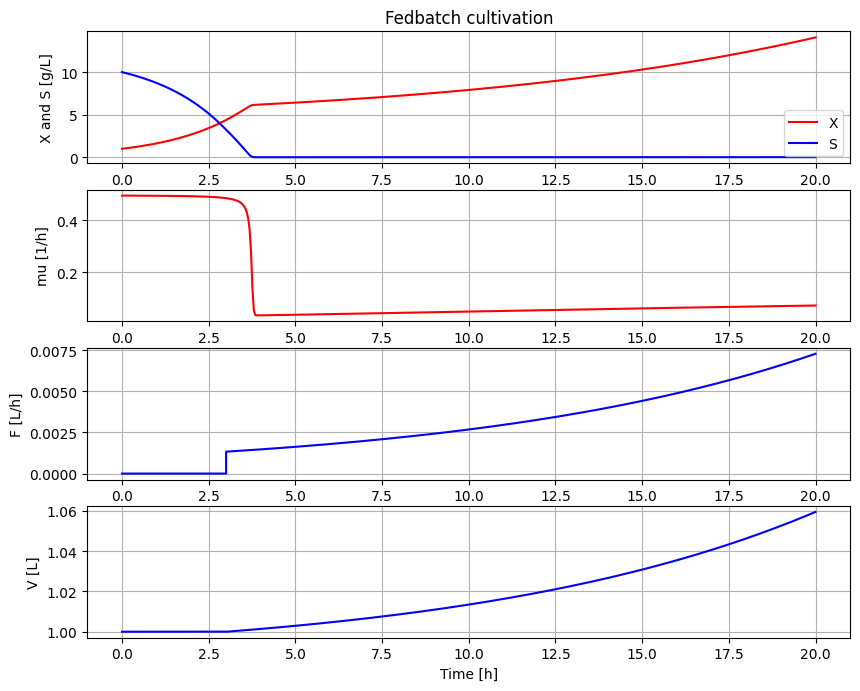

In [17]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu(20)

In [18]:
disp(mode='long')

bioreactor.V_0 : V_0 : 1.0
bioreactor.m_0[1] : VX_0 : 1.0
bioreactor.m_0[2] : VS_0 : 10.0
bioreactor.culture.Y : Y : 0.5
bioreactor.culture.qSmax : qSmax : 1.0
bioreactor.culture.Ks : Ks : 0.1
feedtank.c_in[2] : feedtank.S_in : 300.0
feedtank.V_0 : feedtank.V_0 : 10.0
dosagescheme.mu_feed : mu_feed : 0.1
dosagescheme.t_start : t_start : 3.0
dosagescheme.F_start : F_start : 0.001
dosagescheme.F_max : F_max : 0.3


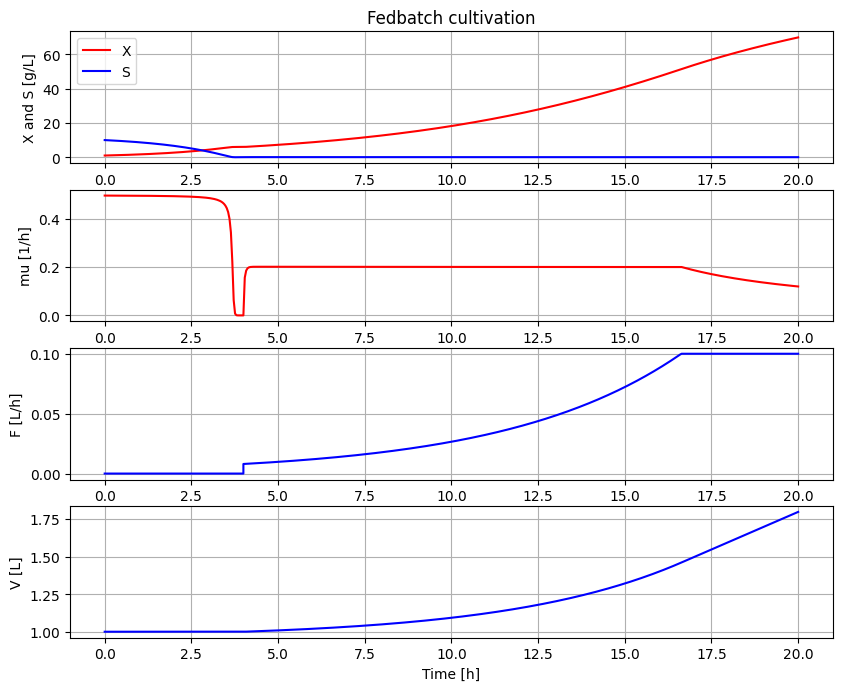

In [19]:
# A more typical feed scheme for the culture at hand
newplot(plotType='TimeSeries')
par(t_start=4, F_start=0.008, mu_feed=0.2, F_max=0.1)
simu(20)

In [20]:
disp('culture')

Y : 0.5
qSmax : 1.0
Ks : 0.1


In [21]:
describe('mu')

Cell specific growth rate variable : 0.12 [ 1/h ]


In [22]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank']


In [23]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput


In [24]:
system_info()


System information
 -OS: Linux
 -Python: 3.10.12
 -Scipy: not installed in the notebook
 -FMPy: 0.3.15
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0
 -FMI: 2.0
 -Type: ME
 -Name: BPL_TEST2.Fedbatch
 -Generated: 2023-04-20T12:24:29Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1
 -Interaction: FMU-explore for FMPy version 0.9.7
